In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [76]:
df.shape

(569, 33)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(['Unnamed: 32', 'diagnosis'], axis=1) # Assuming 'Unnamed: 32' is an irrelevant column and dropping diagnosis as it is the target
y = df['diagnosis'] # Correctly using 'diagnosis' as the target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The data has been split into training and testing sets, and the features have been standardized.

In [79]:
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression()

logisticreg.fit(X_train, y_train)

y_pred = logisticreg.predict(X_test)

In [80]:
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M'], dtype=object)

Text(50.722222222222214, 0.5, 'Truth')

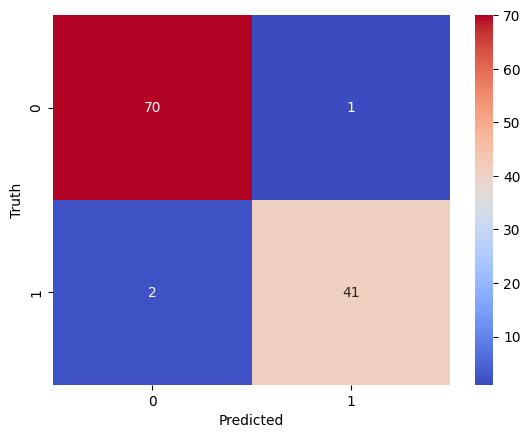

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

data = confusion_matrix(y_test,y_pred)
sns.heatmap(data,annot=True,fmt='d',cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [82]:
accuracy = round(accuracy_score(y_test,y_pred),2)*100
print(f"Accuracy for the Classification Model: {accuracy} %")

Accuracy for the Classification Model: 97.0 %


In [83]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



We can get the predicted probabilities for each class using the `predict_proba` method. This will return an array where each row represents a sample and the columns represent the probability of belonging to each class (in this case, 'B' and 'M').

In [84]:
y_pred_proba = logisticreg.predict_proba(X_test)
display(y_pred_proba)

array([[8.88923128e-01, 1.11076872e-01],
       [9.23186175e-06, 9.99990768e-01],
       [3.20342153e-03, 9.96796578e-01],
       [9.99542270e-01, 4.57729523e-04],
       [9.99950272e-01, 4.97283208e-05],
       [9.23363608e-11, 1.00000000e+00],
       [1.49064805e-09, 9.99999999e-01],
       [3.61239979e-02, 9.63876002e-01],
       [6.16809104e-01, 3.83190896e-01],
       [9.99233887e-01, 7.66113091e-04],
       [9.50614298e-01, 4.93857021e-02],
       [1.28253244e-02, 9.87174676e-01],
       [9.93936285e-01, 6.06371549e-03],
       [1.59014429e-01, 8.40985571e-01],
       [9.98118462e-01, 1.88153808e-03],
       [7.40982799e-04, 9.99259017e-01],
       [9.98322549e-01, 1.67745091e-03],
       [9.99990467e-01, 9.53340968e-06],
       [9.99999219e-01, 7.81050316e-07],
       [1.10792357e-06, 9.99998892e-01],
       [9.12680767e-01, 8.73192331e-02],
       [9.90785337e-01, 9.21466316e-03],
       [4.40603354e-09, 9.99999996e-01],
       [9.99919366e-01, 8.06335924e-05],
       [9.988300

Now, we can apply a custom threshold to these probabilities to classify the instances. For example, let's try a threshold of 0.3 for the positive class ('M'). If the probability of 'M' is greater than 0.3, we will classify it as 'M'; otherwise, as 'B'.

In [85]:
custom_threshold = 0.3
y_pred_custom_threshold = ['M' if prob[1] > custom_threshold else 'B' for prob in y_pred_proba]

# You can now evaluate the model's performance with this custom threshold
print("Classification Report with Custom Threshold:")
print(classification_report(y_test, y_pred_custom_threshold))

Classification Report with Custom Threshold:
              precision    recall  f1-score   support

           B       0.99      0.94      0.96        71
           M       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## Summary of the Notebook

Here is a summary of the work done in this notebook:

1.  **Data Loading and Exploration:** We loaded the breast cancer dataset and performed initial exploration to understand its structure and content using `df.head()`, `df.shape`, and `df.info()`.
2.  **Data Preprocessing:** We separated the features (X) and the target variable (y), which is the 'diagnosis' column. We then split the data into training and testing sets and standardized the features using `StandardScaler`.
3.  **Model Training:** We trained a Logistic Regression model on the standardized training data.
4.  **Model Evaluation:** We evaluated the model's performance using a confusion matrix, accuracy score, and classification report. The initial accuracy was 97%.
5.  **Threshold Tuning:** We explored how to tune the classification threshold by obtaining the predicted probabilities using `predict_proba` and then applying a custom threshold (0.3 in the example) to see its effect on the classification report.

This process allowed us to build and evaluate a logistic regression model for breast cancer diagnosis and understand how to adjust the classification threshold based on specific needs.